In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-6.0930123614543845 40.503590692470766
-62.61482298971438 -57.99034792805146
15.84192410893418 -132.30728223011909
-32.226269809630544 120.31065539289
6.2794231137637695 -13.481181317480946
83.28345127418334 94.35156866769421
-28.988035445578333 -76.97597290539645
75.52284208997858 123.55602934658702
0.7413745056879009 -25.445842098118618
-77.25014883833171 162.67746749358253
-5.730403500293207 135.077710734836
-66.42748474901619 102.05957361047876
-44.70012917837509 143.52774187696588
-62.730734508082044 -91.52752151922382
60.9744613613243 27.47482548405796
-31.028699967151198 140.3650672368388
75.09611515336326 174.41588724390442
69.69404348886295 117.70577623979466
-71.72769084739508 41.723976312944075
-65.09859009531674 177.81703317327685
-84.03014000539412 164.22120208861912
88.12102771830462 12.768373634035555
-77.50374550846198 4.4753144098397115
-10.812864130270071 -97.76108152193656
-53.054266957860825 175.49412135024147
-66.34909487879604 -66.22782511813267
-13.46712129956441

In [8]:
from citipy import citipy

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | sokoni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | guerrero negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | esperance
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | bonthe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | coquimbo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | tiksi
-----------------------------
Data Retrieval Comple

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | beringovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | clyde river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | sentyabrskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | mar del plata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | butaritari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 21 of Set 2 | east london
----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | kaeo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | geraldton
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | morondava
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | kapaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | nanortalik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | lompoc
-----------------------------
Data Retrieval Complete    

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | hambantota
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | port elizabeth
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | husavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | bograd
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | amahai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | sirtich
-----------------------------
Data Retrieval Complete      
-------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | poindimie
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | mayskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | umzimvubu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | tollose
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | mao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | rio gallegos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | salinopolis
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | alta floresta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | mutsamudu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | banepa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | biltine
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | birjand
-----------------------------
Data Retrieval Complete     

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | bolungarvik
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | miandrivazo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | zhigalovo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | yenagoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | fethiye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | gainesville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | pemangkat
-----------------------------
Data Retrieval C

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | pontevedra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | xining
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | rio branco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | yashkul
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | nancha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | roebourne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | okato
-----------------------------
Data Retrieval Complete      
--------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | tecoanapa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | aksu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | sao sebastiao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | vredendal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | mangit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | svetlyy
-----------------------------
Data Retrieval Complete      
-----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | cockburn town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | inhambane
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | ojinaga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | chara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | cruzeiro do sul
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | varnavino
-----------------------------
Data Retrieval Complete      
------

In [16]:
len(city_data)

558

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sokoni,-6.4333,39.5500,80.96,77,100,10.96,TZ,2022-12-27 03:45:25
1,Ushuaia,-54.8000,-68.3000,38.86,93,100,24.16,AR,2022-12-27 03:45:26
2,Guerrero Negro,27.9769,-114.0611,63.70,51,0,6.24,MX,2022-12-27 03:45:26
3,Esperance,-33.8667,121.9000,68.04,65,50,23.89,AU,2022-12-27 03:45:27
4,Bonthe,7.5264,-12.5050,76.91,77,4,0.98,SL,2022-12-27 03:45:27
5,Khatanga,71.9667,102.5000,-35.81,100,68,5.50,RU,2022-12-27 03:45:28
6,Coquimbo,-29.9533,-71.3436,62.33,67,0,2.30,CL,2022-12-27 03:45:28
7,Tiksi,71.6872,128.8694,-14.89,97,100,6.44,RU,2022-12-27 03:45:28
8,Touros,-5.1989,-35.4608,77.74,81,50,10.20,BR,2022-12-27 03:45:29
9,Bluff,-46.6000,168.3333,56.52,71,39,15.32,NZ,2022-12-27 03:45:29


In [18]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [19]:
city_data_df = city_data_df[new_column_order]

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

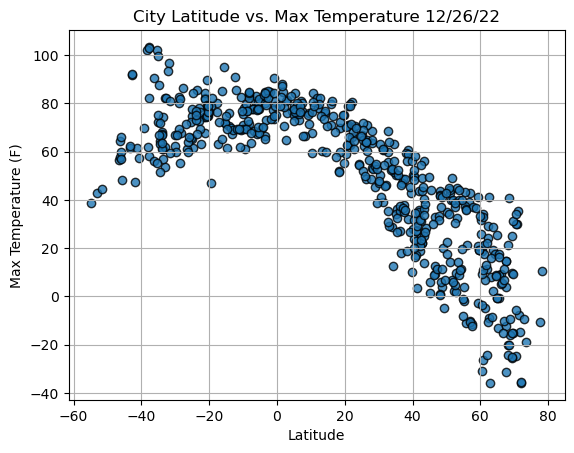

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,humidity,edgecolor="black",linewidth=1,marker="o",alpha=0.8,label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()